In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from matplotlib.pyplot import figure
import math as m
from segment import Segment
from func import *

In [64]:
NUM_PORTS = 4
SIZE = 200
imp0 = 377
connect = 50
tau = 0.3
kappa = 1j* m.sqrt(1-tau**2) # not working yet for complex number

maxTime = 2000

rings_no = 3
N_seg = 6

sources = [[-1,-1],[0,2],[3,5],[2,0],[5,3],[2,4]]
couplings = [[tau,kappa],[tau,kappa],[tau,kappa],[tau,kappa],[tau,kappa],[tau,kappa]]

# sources = Sources(rings_no)
# couplings = Couplings(rings_no, tau)

ez_tab = np.zeros([N_seg, maxTime, SIZE], dtype=complex)

In [65]:

# s = Sources(rings_no)
# print(s)

# c = Couplings(rings_no, tau)
# print(c)



In [66]:
f_array = []

for ii in range(N_seg):
    f = Segment(SIZE)
    f_array.append(f)

for qTime in range(maxTime):
    s = cosMod(qTime, maxTime)
    
    for ii in range(N_seg):
        s1 = sources[ii][0]
        s2 = sources[ii][1]
        tau_ = couplings[ii][0]
        kappa_ = couplings[ii][1]
       
        if (sources[ii][0] == -1):
            s_new = s
            xs = 50
        else:
            s_new = tau_*f_array[s1].ez[-1] + kappa_*f_array[s2].ez[-1]
            xs = 2 
            
        f_array[ii].hy_update()
        f_array[ii].hy_sources(s_new,xs)
        f_array[ii].ez_update()
        f_array[ii].ez_sources(s_new,xs)

        ez_tab[ii,qTime,:] = f_array[ii].ez[:]   

for ii in range(N_seg):
    filename = f"ez_tab_{ii:04d}.csv"  # e.g., ez_tab_0000.txt, ez_tab_0001.txt, ...
    np.savetxt(filename, ez_tab[ii, :, :], delimiter=",")

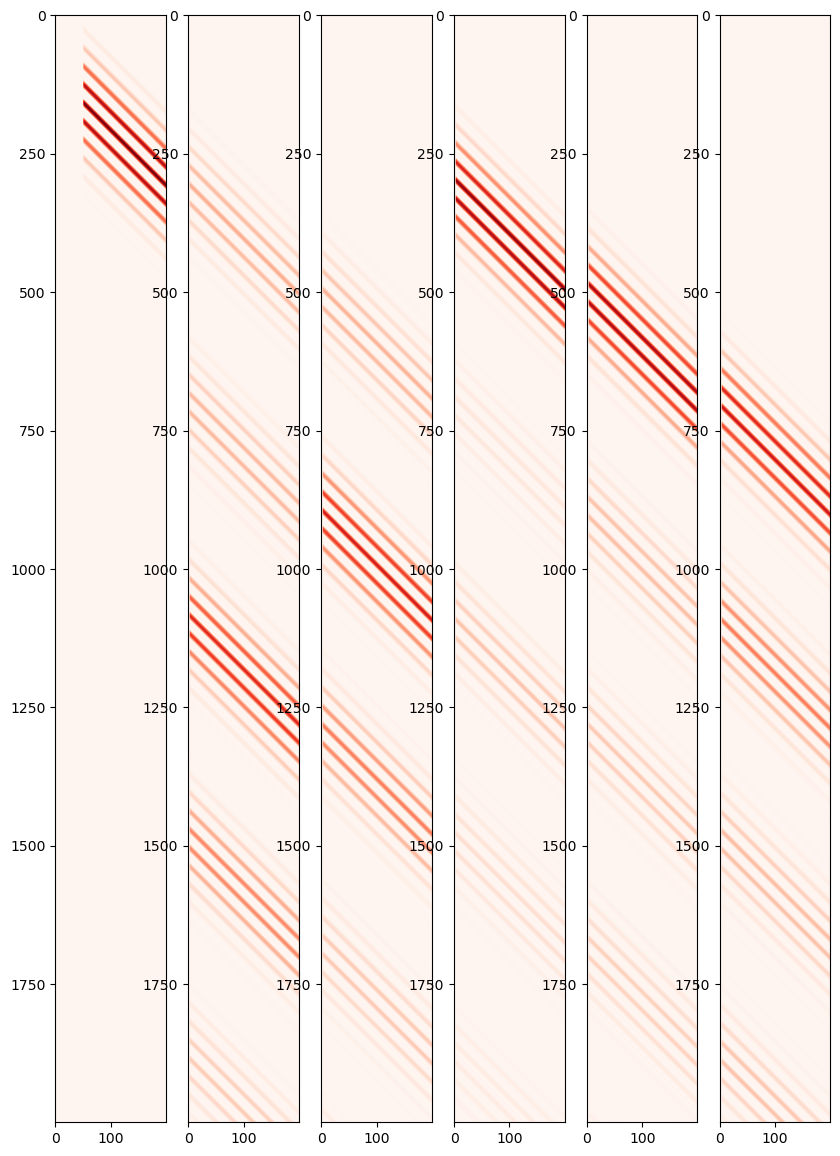

In [67]:
f, ax = plt.subplots(1,6, figsize=(10,15)) 

vmax_val = np.max(np.real(ez_tab[0,:,:]))

for ii in range(6):
    ax[ii].imshow(np.real(ez_tab[ii,:,:]), vmin = 0, vmax = vmax_val , cmap = 'Reds')
# plt.savefig("ez_real.png")

# f, ax2 = plt.subplots(1,6, figsize=(10,15)) 
# for ii in range(6):
#     ax2[ii].imshow(np.imag(ez_tab[ii,:,:]), vmin = 0, vmax = vmax_val , cmap = 'Reds')
# plt.savefig("ez_imag.png")

# f, ax3 = plt.subplots(1,6, figsize=(10,15)) 
# for ii in range(6):
#     ax3[ii].imshow(abs(ez_tab[ii,:,:]), vmin = 0, vmax = vmax_val , cmap = 'Reds')
# plt.savefig("ez_abs.png")
# plt.plot(ez_tab[:,15])

In [68]:
Ez = np.zeros((maxTime-1,SIZE), dtype=complex)
yf = np.zeros((maxTime-1,SIZE), dtype=complex)
N = maxTime-1
T = 1
xf = fftfreq(N,T)

for ii in range(N_seg):
    filename = f"ez_tab_{ii:04d}.csv"
    df = pd.read_csv(filename)
    # print(df.shape)
    
    Ez[:,ii] = df.iloc[:,100]
    Ez[:,ii] -= np.mean(Ez[:,ii])
    
    yf[:,ii] = abs(fft(Ez[:,ii]))
    
    #accessing particular columns - all elements(all time steps for a particular spatial coordinate.)
x = range(len(df.iloc[0,:])) 
print(x)   

# for ii in range(N_seg):
#     figure(figsize=(10, 10), dpi=80)
#     plt.subplot(2,1,1)
#     plt.plot(Ez[:,ii], label={ii})
#     plt.title("Temporal Evolution")
#     plt.xlabel("time")
#     plt.ylabel("Ez(t)")
#     plt.legend()
#     plt.subplot(2,1,2)
#     plt.plot(xf,yf[:,ii], label={ii})
#     plt.xlim([0.02,0.04])
#     plt.title("Frequency Spectrum")
#     plt.xlabel("frequency")
#     plt.ylabel("Ez(f)")
#     plt.legend()
#     plt.show()

range(0, 200)


6


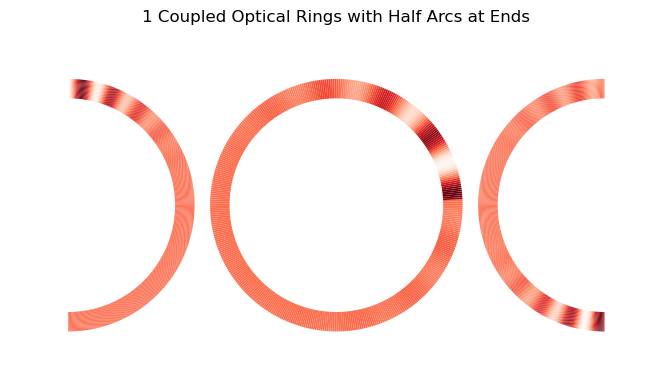

6


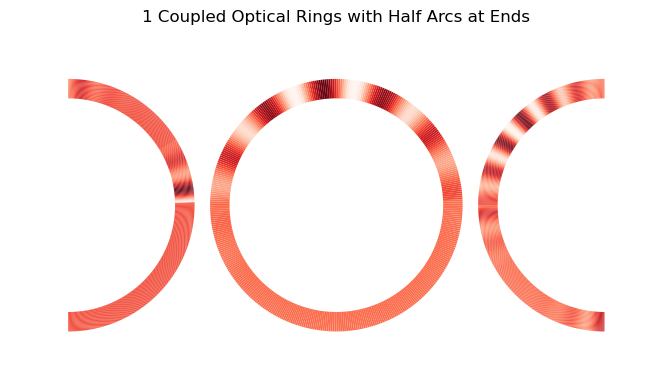

6


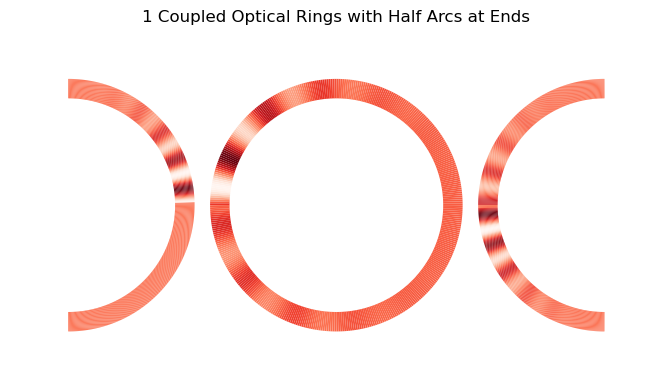

6


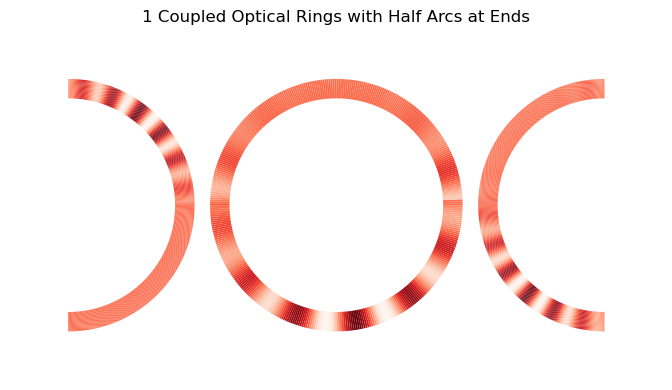

6


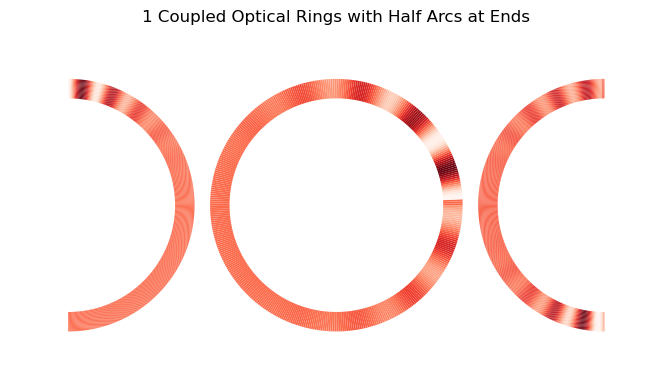

In [69]:
# Parameters

for tp in range(900,1350,100):
    ez_tab_tp = ez_tab[:,tp,:]
    plot_field_ring(ez_tab_tp)

